<a href="https://colab.research.google.com/github/SuRak35/Causal_Inference__ISI-Kolkata/blob/main/Basic_Example_for_Calculating_the_Causal_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calculating Causal Inference Using DoWhy

This is a quick introduction to the DoWhy causal inference library. We will load in a sample dataset and estimate the causal effect of a (pre-specified) treatment variable on a (pre-specified) outcome variable.

First, let us load all required packages.

In [ ]:
!pip install dowhy
!sudo apt install graphviz libgraphviz-dev graphviz-dev pkg-config
#from https://github.com/pygraphviz/pygraphviz/issues/71
!pip install pygraphviz --install-option="--include-path=/usr/include/graphviz" \
--install-option="--library-path=/usr/lib/graphviz/"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 49 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,670 kB of additional disk space will be used.
Get

#Example From Internet

In [ ]:
%psource df.causal.do

In [ ]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=3,
    num_instruments=1,
    num_samples=10000,
    treatment_is_binary=True)

In [ ]:
# Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

In [ ]:
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                 
─────(E[y|W1,W2,W0])
d[v₀]               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W2,W0,U) = P(y|v0,W1,W2,W0)

## Realized estimand
b: y~v0+W1+W2+W0
Target units: ate

## Estimate
Mean value: 9.995387732723284



##A high-level pandas API
We’ve made an even simpler API for dowhy which is a light layer on top of the standard one. The goal was to make causal analysis much more like regular exploratory analysis.

The do method in the causal namespace generates a random sample from  P(outcome|do(X=x))  of the same length as your data set, and returns this outcome as a new DataFrame.

In [ ]:
import dowhy.api
import dowhy.datasets

data = dowhy.datasets.linear_dataset(beta=5,
    num_common_causes=1,
    num_instruments = 0,
    num_samples=100,
    treatment_is_binary=True)

df = data['df']
df.head()

,W0,v0,y
0,0.026505,False,0.067995
1,1.235534,True,8.271409
2,-2.663308,False,-7.025230
3,0.068011,True,5.166066
4,1.381563,True,8.656839


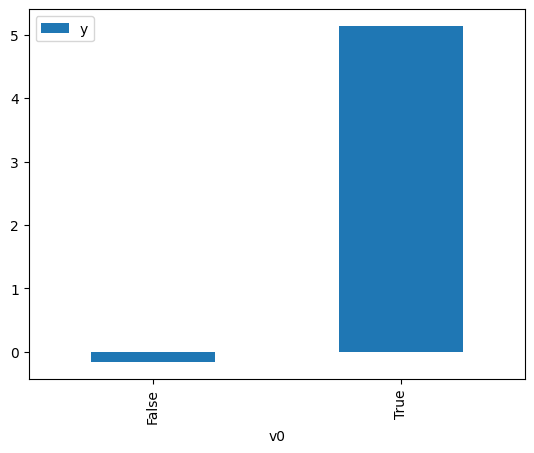

In [ ]:
import matplotlib.pyplot as plt

# data['df'] is just a regular pandas.DataFrame
d = data['df'].causal.do(x='v0', # Changed 'v' to 'v0' to match the actual column name
                     variable_types={'v0': 'b', 'y': 'c', 'W0': 'c'}, # Changed 'v' to 'v0' and 'X0' to 'W0'
                     outcome='y',
                     common_causes=['W0']) # Changed 'X0' to 'W0'
                     #proceed_when_unidentifiable=True)
d.groupby('v0').mean().plot(y='y', kind='bar') # Changed 'v' to 'v0'
plt.show()

In [ ]:
d.head()

,W0,v0,y,propensity_score,weight
0,-0.953352,False,-2.521858,0.770525,1.297816
1,0.852248,False,2.263544,0.161680,6.185044
2,-0.114233,False,-0.310457,0.470911,2.123542
3,-0.185970,False,-0.480721,0.499257,2.002978
4,0.068011,True,5.166066,0.599854,1.667073


#Example from GitLab

let us load a dataset. For simplicity, we simulate a dataset with linear relationships between common causes and treatment, and common causes and outcome.

Beta is the true causal effect.

In [ ]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets

In [ ]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [ ]:
df.head()

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-1.110382,1.0,0.413343,0.521478,-0.650500,-1.042653,0.656458,1,True,0.610372
1,0.919616,1.0,0.489989,0.885153,-2.233281,-0.043541,-0.564005,2,False,-11.040105
2,-0.165057,1.0,0.288328,0.540682,-1.197013,-0.127046,0.953130,2,True,7.238658
3,0.148263,1.0,0.829814,2.981645,1.209215,-0.347569,0.888721,1,True,21.367770
4,0.147331,1.0,0.368820,1.135805,-0.400243,-1.069845,1.118647,0,True,9.727667


##Interface 1 (recommended): Input causal graph
We now input a causal graph in the GML graph format (recommended).

In [ ]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

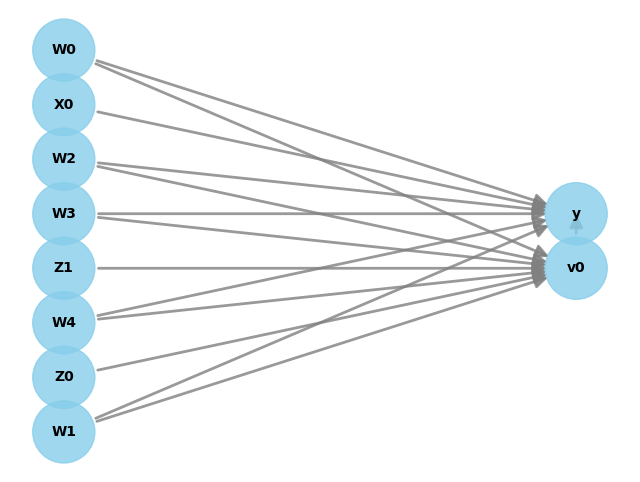

In [ ]:
model.view_model()

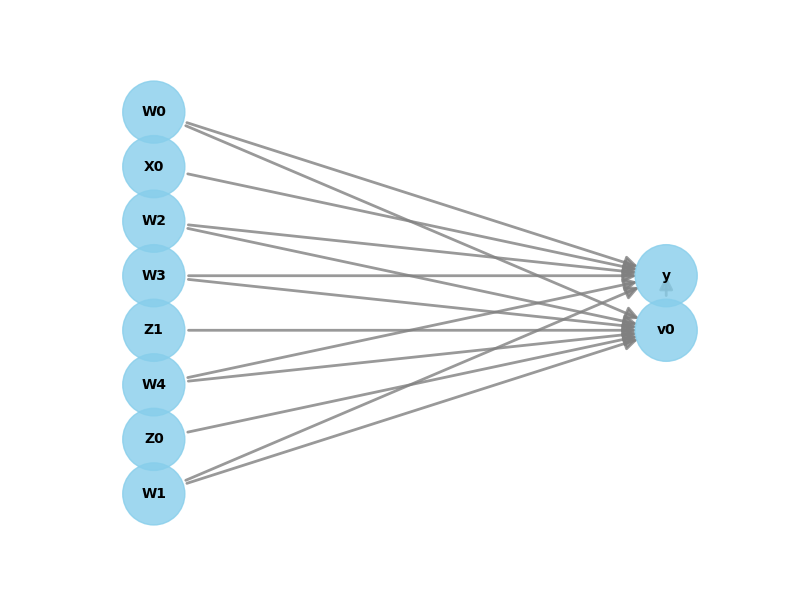

In [ ]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

The above causal graphs shows the assumptions encoded in the causal model. We can now use these graphs to first identify the causal effect (go from a causal estimand to a probability expression), and then estimate the causal effect.

##DoWhy philosophy: Keep identification and estimation separate
Identification can be achieved without access to the data, acccesing only the graph. This results in an expression to be computed. This expression can then be evaluated using the available data in the estimation step. It is important to understand that these are orthogonal steps.

###Identification

In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W4,W3,W2,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W4,W3,W2,W0,U) = P(y|v0,W1,W4,W3,W2,W0)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁]    ⎝d[Z₀  Z₁]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Note the parameter flag proceed_when_unidentifiable. It needs to be set to True to convey the assumption that we are ignoring any unobserved confounding. The default behavior is to prompt the user to double-check that the unobserved confounders can be ignored.

###Estimation

In [ ]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W4,W3,W2,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W4,W3,W2,W0,U) = P(y|v0,W1,W4,W3,W2,W0)

## Realized estimand
b: y~v0+W1+W4+W3+W2+W0
Target units: ate

## Estimate
Mean value: 12.828635843091085



In [ ]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W4,W3,W2,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W4,W3,W2,W0,U) = P(y|v0,W1,W4,W3,W2,W0)

## Realized estimand
b: y~v0+W1+W4+W3+W2+W0
Target units: atc

## Estimate
Mean value: 12.887338074160844

Causal Estimate is 12.887338074160844


##Interface 2: Specify common causes and instruments

In [ ]:
# Without graph
model= CausalModel(
        data=df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])

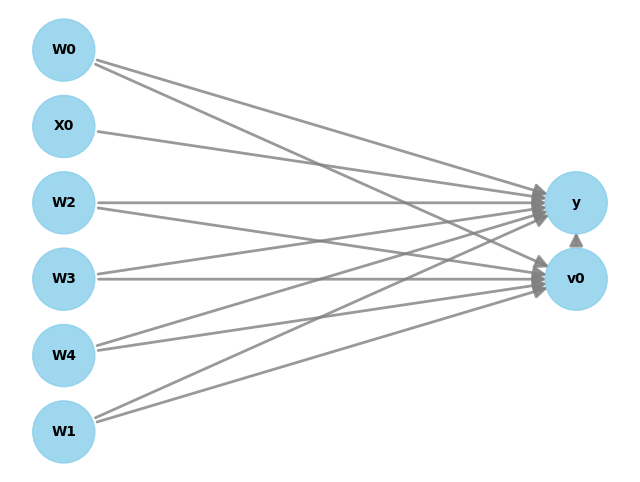

In [ ]:
model.view_model()

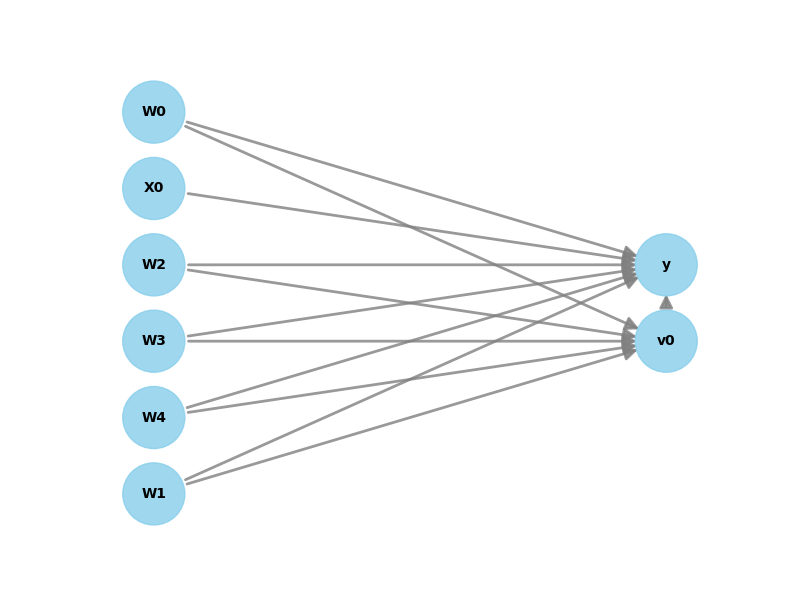

In [ ]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

We get the same causal graph. Now identification and estimation is done as before.

In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

In [ ]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W4,W3,W2,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W4,W3,W2,W0,U) = P(y|v0,W1,W4,W3,W2,W0)

## Realized estimand
b: y~v0+W1+W4+W3+W2+W0
Target units: ate

## Estimate
Mean value: 12.828635843091085

Causal Estimate is 12.828635843091085


##Refuting the estimate
Let us now look at ways of refuting the estimate obtained. Refutation methods provide tests that every correct estimator should pass. So if an estimator fails the refutation test (p-value is < 0.05), then it means that there is some problem with the estimator.

Note that we cannot verify that the estimate is correct, but we can reject it if it violates certain expected behavior (this is analogous to scientific theories that can be falsified but not proven true). The below refutation tests are based on either 1) Invariant transformations: changes in the data that should not change the estimate. Any estimator whose result varies significantly between the original data and the modified data fails the test;

Random Common Cause

Data Subset

Nullifying transformations: after the data change, the causal true estimate is zero. Any estimator whose result varies significantly from zero on the new data fails the test.

Placebo Treatment

###Adding a random common cause variable

In [ ]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Add a random common cause
Estimated effect:12.828635843091085
New effect:12.828635843091085
p value:1.0



###Replacing treatment with a random (placebo) variable

In [ ]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", show_progress_bar=True, placebo_type="permute")
print(res_placebo)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a Placebo Treatment
Estimated effect:12.828635843091085
New effect:-0.045614109182235095
p value:0.92



###Removing a random subset of the data

In [ ]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", show_progress_bar=True, subset_fraction=0.9)
print(res_subset)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a subset of data
Estimated effect:12.828635843091085
New effect:12.86544666800425
p value:0.8600000000000001



We can see, the propensity score stratification estimator is reasonably robust to refutations.

Reproducability: For reproducibility, we can add a parameter “random_seed” to any refutation method, as shown below.

Parallelization: We can also use built-in parallelization to speed up the refutation process.

In [ ]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", show_progress_bar=True, subset_fraction=0.9, random_seed = 1, n_jobs=-1, verbose=10)
print(res_subset)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.2min


Refute: Use a subset of data
Estimated effect:12.828635843091085
New effect:12.864331263447593
p value:0.8799999999999999



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


###Adding an unobserved common cause variable
This refutation does not return a p-value. Instead, it provides a sensitivity test on how quickly the estimate changes if the identifying assumptions (used in identify_effect) are not valid. Specifically, it checks sensitivity to violation of the backdoor assumption: that all common causes are observed.

To do so, it creates a new dataset with an additional common cause between treatment and outcome. To capture the effect of the common cause, the method takes as input the strength of common cause’s effect on treatment and outcome. Based on these inputs on the common cause’s effects, it changes the treatment and outcome values and then reruns the estimator. The hope is that the new estimate does not change drastically with a small effect of the unobserved common cause, indicating a robustness to any unobserved confounding.

Another equivalent way of interpreting this procedure is to assume that there was already unobserved confounding present in the input data. The change in treatment and outcome values removes the effect of whatever unobserved common cause was present in the original data. Then rerunning the estimator on this modified data provides the correct identified estimate and we hope that the difference between the new estimate and the original estimate is not too high, for some bounded value of the unobserved common cause’s effect.

Importance of domain knowledge: This test requires domain knowledge to set plausible input values of the effect of unobserved confounding. We first show the result for a single value of confounder’s effect on treatment and outcome.

In [ ]:
res_unobserved=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_refuters/add_unobserved_common_cause.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  new_data.loc[rel_interval <= w_random, treatment_name] = (


Refute: Add an Unobserved Common Cause
Estimated effect:12.828635843091085
New effect:9.264073326563242



It is often more useful to inspect the trend as the effect of unobserved confounding is increased. For that, we can provide an array of hypothesized confounders’ effects. The output is the (min, max) range of the estimated effects under different unobserved confounding.

/usr/local/lib/python3.10/dist-packages/dowhy/causal_refuters/add_unobserved_common_cause.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  new_data.loc[rel_interval <= w_random, treatment_name] = (


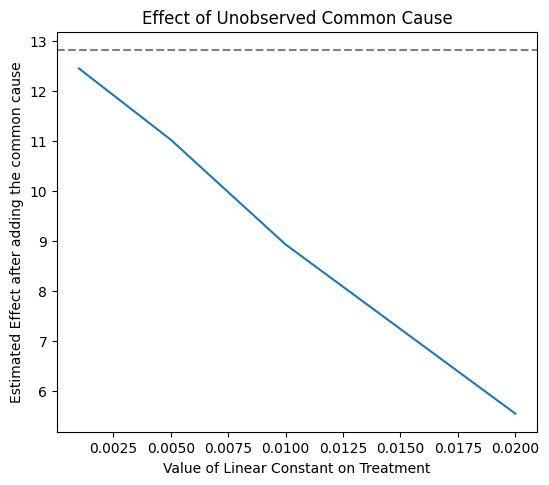

Refute: Add an Unobserved Common Cause
Estimated effect:12.828635843091085
New effect:(5.551282792386479, 12.459186667273833)



In [ ]:
res_unobserved_range=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=np.array([0.001, 0.005, 0.01, 0.02]), effect_strength_on_outcome=0.01)
print(res_unobserved_range)

The above plot shows how the estimate decreases as the hypothesized confounding on treatment increases. By domain knowledge, we may know the maximum plausible confounding effect on treatment. Since we see that the effect does not go beyond zero, we can safely conclude that the causal effect of treatment v0 is positive.

We can also vary the confounding effect on both treatment and outcome. We obtain a heatmap.

/usr/local/lib/python3.10/dist-packages/dowhy/causal_refuters/add_unobserved_common_cause.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  new_data.loc[rel_interval <= w_random, treatment_name] = (


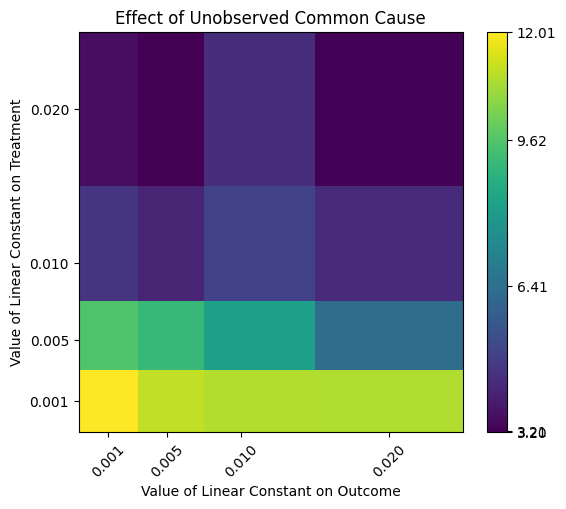

Refute: Add an Unobserved Common Cause
Estimated effect:12.828635843091085
New effect:(3.1977325127764265, 12.009442114681594)



In [ ]:
res_unobserved_range=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                           confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                           effect_strength_on_treatment=[0.001, 0.005, 0.01, 0.02],
                                           effect_strength_on_outcome=[0.001, 0.005, 0.01,0.02])
print(res_unobserved_range)

Automatically inferring effect strength parameters. Finally, DoWhy supports automatic selection of the effect strength parameters. This is based on an assumption that the effect of the unobserved confounder on treatment or outcome cannot be stronger than that of any observed confounder. That is, we have collected data at least for the most relevant confounder. If that is the case, then we can bound the range of effect_strength_on_treatment and effect_strength_on_outcome by the effect strength of observed confounders. There is an additional optional parameter signifying whether the effect strength of unobserved confounder should be as high as the highest observed, or a fraction of it. You can set it using the optional effect_fraction_on_treatment and effect_fraction_on_outcome parameters. By default, these two parameters are 1.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_refuters/add_unobserved_common_cause.py:304: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_dev_y = np.std(y)[0]
/usr/local/lib/python3.10/dist-

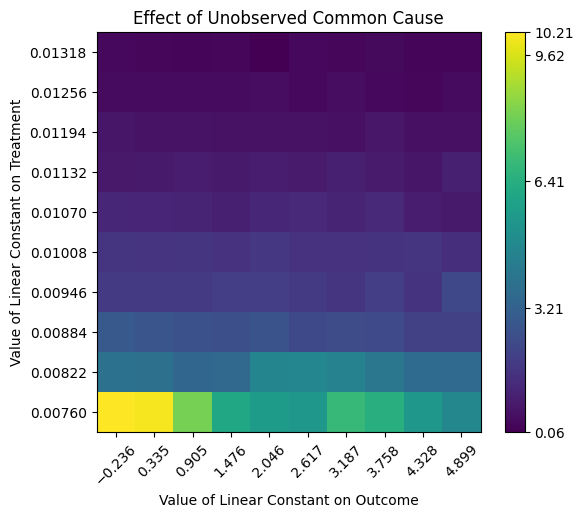

Refute: Add an Unobserved Common Cause
Estimated effect:12.828635843091085
New effect:(0.06444398180889854, 10.206949217397156)



In [ ]:
res_unobserved_auto = model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                           confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear")
print(res_unobserved_auto)

Conclusion: Assuming that the unobserved confounder does not affect the treatment or outcome more strongly than any observed confounder, the causal effect can be concluded to be positive.